In [1]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter
import numpy as np
import os

import ROOT as root

xfmt = ScalarFormatter()
xfmt.set_powerlimits((6,6))
xfmt.useMathText = True

Welcome to JupyROOT 6.18/00


In [2]:
tr0_dir = "/home/watchman/Documents/lappdsoft/lappd/data/gain/scan_tr0"
tr1_dir = "/home/watchman/Documents/lappdsoft/lappd/data/gain/scan_tr1"

In [3]:
tr0_ypos = [55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
tr1_ypos = [10, 15, 20, 25, 30, 35, 40, 45, 50, 55]
tr0_strips = [14, 13, 12, 11, 10, 9, 8, 7]
tr1_strips = [6, 5, 4, 3, 2, 1, -1]

xpos = [30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

In [4]:
tr0_data = {}
for x in xpos:
    tr0_data[x] = {}
    for y in tr0_ypos:
        tr0_data[x][y] = {}
        for strip in tr0_strips:
            tr0_data[x][y][strip] = np.load(f"{tr0_dir}/x{x}/y{y}/gain_{strip}.npy")

tr1_data = {}
for x in xpos:
    tr1_data[x] = {}
    for y in tr1_ypos:
        tr1_data[x][y] = {}
        for strip in tr1_strips:
            tr1_data[x][y][strip] = np.load(f"{tr1_dir}/x{x}/y{y}/gain_{strip}.npy")

In [5]:
gain_binmin = -4e6
gain_binmax = 2.5e7
gain_bin_width = 0.2e6
heights_binmin = 0
heights_binmax = 150
heights_binwidth = 0.5
gain_bins = np.arange(gain_binmin, gain_binmax, gain_bin_width)
height_bins = np.arange(heights_binmin, heights_binmax, heights_binwidth)

In [6]:
def plot_hist(data, x, y, strip):
    try:
        plt.hist(data[x][y][strip], gain_bins, histtype="step", label=f"{x} x, {y} y, {strip} strip", density=True, alpha=0.8)
    except KeyError:
        pass

vec_plot_hist = np.vectorize(plot_hist, otypes=[None])

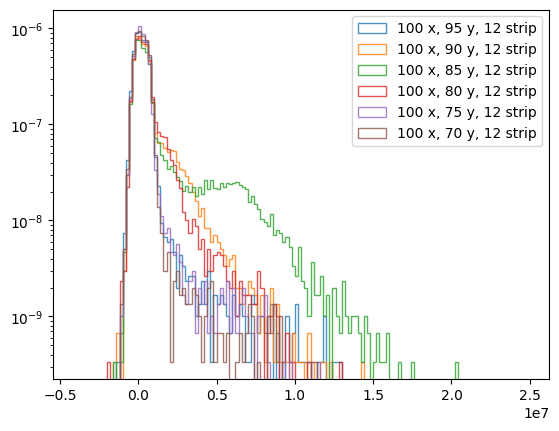

In [7]:
vec_plot_hist(tr0_data, 100, [95, 90, 85, 80,75, 70], [12])
plt.yscale("log")
plt.legend()
plt.show()

 FCN=3165.83 FROM MIGRAD    STATUS=CONVERGED     216 CALLS         217 TOTAL
                     EDM=8.45093e-11    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     2.64277e+03   3.02509e+01   6.67525e-01   2.80598e-07
   2  Mean         3.88081e+05   3.34925e+03   7.86463e+01  -1.73914e-09
   3  Sigma        3.57409e+05   2.44516e+03   2.24757e-05  -3.24282e-03
 FCN=11419.8 FROM MIGRAD    STATUS=CONVERGED     202 CALLS         203 TOTAL
                     EDM=4.34367e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     1.71935e+02   4.02606e+00   1.49983e-01   1.74925e-05
   2  Mean         2.70990e+06   5.29259e+04   3.55261e-04  -4.21202e-02
   3  Sigma        1.68055e+06   

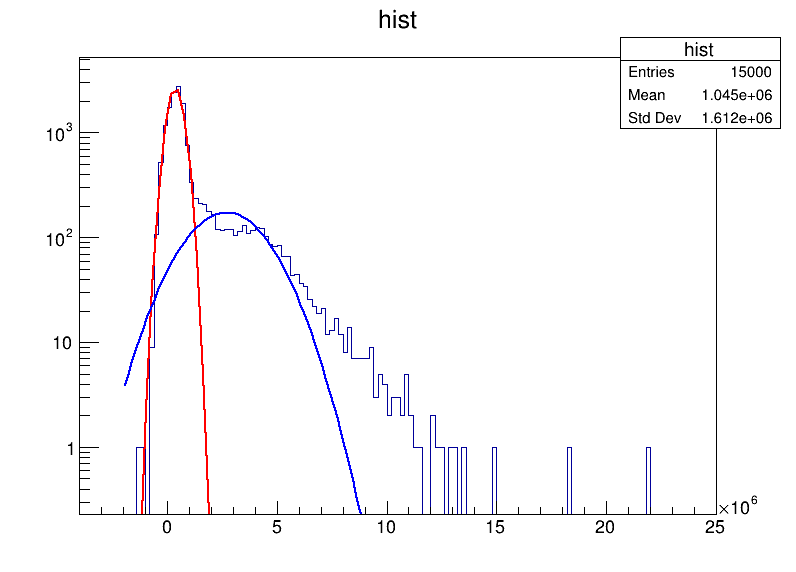

In [8]:
c = root.TCanvas("myCanvasName","The Canvas Title",800,600)
th1 = root.TH1F("hist", "hist", len(gain_bins), gain_binmin, gain_binmax)
for value in tr0_data[100][75][11]:
    th1.Fill(value)
fit = root.TF1("fit", "gaus")
th1.Fit(fit)
fit2 = root.TF1("fit2", "gaus", -2e6, 15e6)
fit2.SetParameter(1, 6e6)
fit2.SetParLimits(1, fit.GetParameter(1)+fit.GetParameter(2), 12e6)
fit2.SetLineColor(4)
th1.Fit(fit2, "R+")
root.gPad.SetLogy()
th1.Draw()
c.Draw()

In [9]:
del th1
del c

In [10]:
gain_vals_tr0 = {}

for x in xpos:
    gain_vals_tr0[x] = {}
    for y in tr0_ypos:
        gain_vals_tr0[x][y] = {}
        for strip in tr0_strips:
            th1 = root.TH1F("hist", "hist", len(gain_bins), gain_binmin, gain_binmax)
            for value in tr0_data[x][y][strip]:
                th1.Fill(value)
            fit = root.TF1("fit", "gaus")
            th1.Fit(fit, "Q")
            fit2 = root.TF1("fit2", "gaus", -2e6, 15e6)
            fit2.SetParameter(1, 6e6)
            fit2.SetParLimits(1, fit.GetParameter(1)+fit.GetParameter(2), 12e6)
            fit2.SetLineColor(4)
            th1.Fit(fit2, "RQ+")
            gain_vals_tr0[x][y][strip] = fit2.GetParameter(1)
            del th1

gain_vals_tr1 = {}

for x in xpos:
    gain_vals_tr1[x] = {}
    for y in tr1_ypos:
        gain_vals_tr1[x][y] = {}
        for strip in tr1_strips:
            th1 = root.TH1F("hist", "hist", len(gain_bins), gain_binmin, gain_binmax)
            for value in tr1_data[x][y][strip]:
                th1.Fill(value)
            fit = root.TF1("fit", "gaus")
            th1.Fit(fit, "Q")
            fit2 = root.TF1("fit2", "gaus", -2e6, 15e6)
            fit2.SetParameter(1, 6e6)
            fit2.SetParLimits(1, fit.GetParameter(1)+fit.GetParameter(2), 12e6)
            fit2.SetLineColor(4)
            th1.Fit(fit2, "RQ+")
            gain_vals_tr1[x][y][strip] = fit2.GetParameter(1)
            del th1
            

Info in <TCanvas::MakeDefCanvas>:  created default TCanvas with name c1
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Math::ParameterSettings>: lower/upper bounds outside current parameter value. The value will be set to (low+up)/2 
Info in <ROOT::Mat

In [11]:
gain_tr0 = []
for y in tr0_ypos:
    for x in xpos:
        vals = np.asarray(list(gain_vals_tr0[x][y].values()))
        best_val = np.max(vals[vals>0])
        # if best_val > 0.1:
        #     print("BAD", x, y)
        # if best_val == 0:
        #     print("ZERO", x, y)
        print(f"x {x}, y {y}, {best_val}")
        gain_tr0.append(best_val)

gain_tr1 = []
for y in tr1_ypos:
    for x in xpos:
        vals = np.asarray(list(gain_vals_tr1[x][y].values()))
        best_val = np.max(vals[vals>0])
        # if best_val > 0.1:
        #     print("BAD", x, y)
        # if best_val == 0:
        #     print("ZERO", x, y)
        print(f"x {x}, y {y}, {best_val}")
        gain_tr1.append(best_val)

x 30, y 55, 11999921.421060663
x 40, y 55, 7901794.750681842
x 50, y 55, 9400008.147747407
x 60, y 55, 7462406.196491852
x 70, y 55, 6775482.035951915
x 80, y 55, 3432161.087353858
x 90, y 55, 10068920.123206053
x 100, y 55, 1492097.5037811042
x 110, y 55, 9398985.970578678
x 120, y 55, 10553688.004132042
x 130, y 55, 6646356.633495558
x 140, y 55, 7095218.618845959
x 150, y 55, 1229836.1313605304
x 160, y 55, 6294601.790487736
x 170, y 55, 7107303.5037838565
x 180, y 55, 11901157.547433972
x 190, y 55, 7345464.831619933
x 200, y 55, 10199999.513342306
x 30, y 60, 8013891.455354825
x 40, y 60, 1103858.9079011823
x 50, y 60, 7288096.540875269
x 60, y 60, 6343059.33379495
x 70, y 60, 8493702.101363756
x 80, y 60, 8640577.318246435
x 90, y 60, 6306171.633554432
x 100, y 60, 7093159.571862328
x 110, y 60, 1133764.0191910432
x 120, y 60, 10020703.549313052
x 130, y 60, 6104485.31086472
x 140, y 60, 6855373.181253739
x 150, y 60, 4476985.854421862
x 160, y 60, 5601442.543717884
x 170, y 60, 

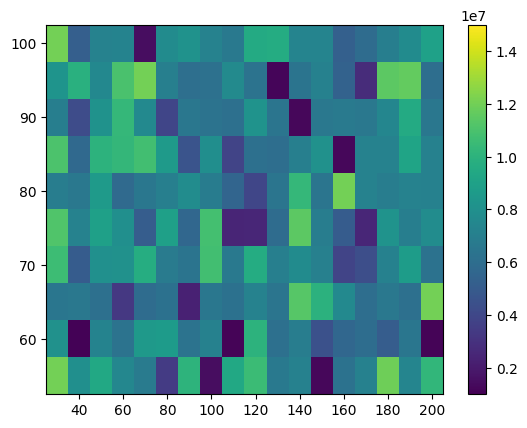

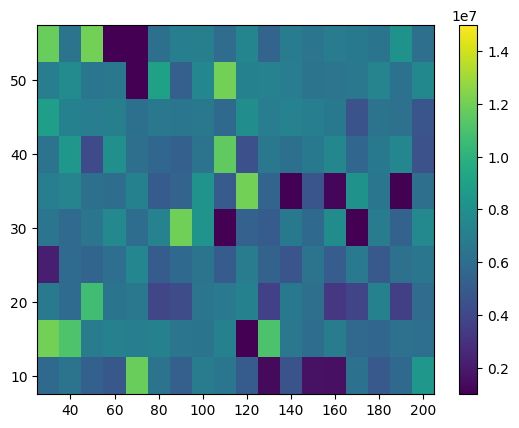

In [12]:
xx0, yy0 = np.meshgrid(xpos, tr0_ypos)
zz0 = np.asarray(gain_tr0).reshape(len(tr0_ypos), len(xpos))
plt.pcolormesh(xx0, yy0, zz0, vmin=1e6, vmax=1.5e7)
plt.colorbar()
plt.show()

xx1, yy1 = np.meshgrid(xpos, tr1_ypos)
zz1 = np.asarray(gain_tr1).reshape(len(tr1_ypos), len(xpos))
plt.pcolormesh(xx1, yy1, zz1, vmin=1e6, vmax=1.5e7)
plt.colorbar()
plt.show()

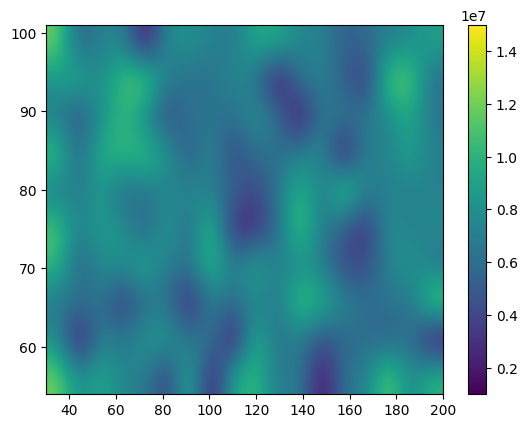

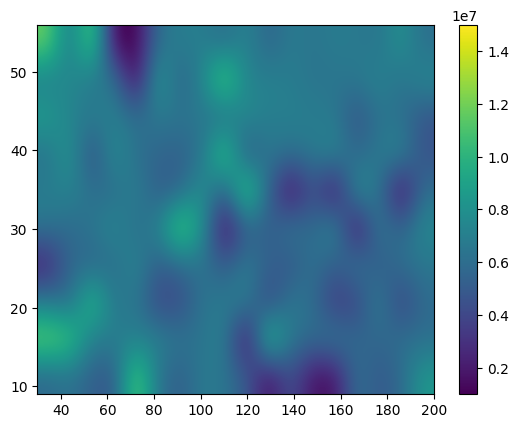

In [13]:
plt.imshow(zz0, vmin=1e6, vmax=1.5e7, interpolation="bicubic", aspect="auto", origin="lower", extent=[30, 200, 54, 101])
plt.colorbar()
plt.show()

plt.imshow(zz1, vmin=1e6, vmax=1.5e7, interpolation="bicubic", aspect="auto", origin="lower", extent=[30, 200, 9, 56])
plt.colorbar()
plt.show()

In [14]:
print(zz1[-1,:])
print(zz0[0,:])
zz0[0,:] = (zz0[0,:]+zz1[-1,:])/2.0
zz1 = np.delete(zz1, -1, axis=0)

[11808764.36549024  6356349.78088049 11997007.49360645   965864.22889059
   959409.44947961  6128857.42718808  6939455.07343706  6999993.07901951
  5918803.80616522  7393251.36313509  5460065.83341954  6781364.37871329
  6428817.97971763  6825279.39802248  6656362.52735208  6395080.37057115
  8090759.07185396  6078546.14861737]
[11999921.42106066  7901794.75068184  9400008.14774741  7462406.19649185
  6775482.03595192  3432161.08735386 10068920.12320605  1492097.5037811
  9398985.97057868 10553688.00413204  6646356.63349556  7095218.61884596
  1229836.13136053  6294601.79048774  7107303.50378386 11901157.54743397
  7345464.83161993 10199999.51334231]


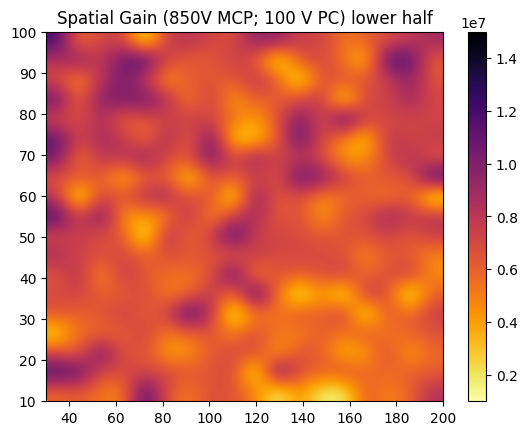

In [20]:
plt.imshow(np.vstack((zz1, zz0)), vmin=1e6, vmax=1.5e7, interpolation="bicubic", aspect="auto", origin="lower", extent=[30, 200, 10, 100], cmap="inferno_r")
plt.title("Spatial Gain (850V MCP; 100 V PC) lower half")
plt.colorbar()
plt.show()